# **INTEGRANTES - GRUPO LEADTECH**

- Bianca Leticia Roman Caldeira - RM: 552267 - Turma: 2TDSPH
- Charlene Aparecida Estevam Mendes Fialho - RM: 552252 - Turma: 2TDSPH
- Lais Alves da Silva Cruz - RM: 552258 - Turma: 2TDSPH
- Fabricio Torres Antonio - RM: 97916 - Turma: 2TDSPH
- Lucca Raphael Pereira dos Santos - RM: 99675 - Turma: 2TDSPH

# **Análise de Crédito - Resolução**

> Utilização de deep analytics e machine learning para solução de um problema.

### ***Descrição :***
Neste notebook, apresentamos uma análise abrangente sobre os desafios enfrentados pela ABX Tecnologia no processo de análise de crédito de seus clientes. Abordamos questões como padronização da análise de crédito, classificação automática de clientes e automação da recomendação de crédito. Utilizamos técnicas de deep analytics e modelos de machine learning para propor soluções eficazes que visam melhorar a eficiência e a precisão da análise de crédito. Este notebook oferece insights valiosos e soluções práticas para aprimorar o processo de tomada de decisão da ABX Tecnologia no que diz respeito à concessão de crédito.

### ***Objetivos :***
1. Padronização da Análise de Crédito.
2. Classificação Automática de Clientes.
3. Automação da Recomendação de Crédito.

## ***Importação das bibliotecas***
Nesta seção, importamos as bibliotecas Python necessárias para realizar a análise.

In [1]:
# Importando a biblioteca pandas para manipulação e análise de dados
import pandas as pd

# Importando a biblioteca numpy para operações numéricas
import numpy as np

# Importando a biblioteca matplotlib.pyplot para visualização de gráficos
import matplotlib.pyplot as plt

# Importando a biblioteca seaborn para visualização estatística e aprimoramento dos gráficos
import seaborn as sns

## ***Carregamento dos Dados***

Nesta seção, carregamos os dados fornecidos.

In [2]:
# Adicionando url do dataset
url = '../dataset/solicitacoescredito.csv'

# Carregando o conjunto de dados do arquivo CSV para um DataFrame
df = pd.read_csv(url)

In [53]:
# Visualize as primeiras linhas do dataset
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


## ***Preparação dos Dados***

Nesta seção, realizamos as etapas iniciais de preparação dos dados, incluindo a limpeza, transformação e análise exploratória.

### *Análise Exploratória dos Dados*

Realizamos uma análise exploratória inicial dos dados para entender melhor sua estrutura, distribuição, características. 

####   Visualização de Estrutura e Distribuição

Neste tópico, examinamos a estrutura dos dados e a distribuição de suas características principais.

In [4]:
# Visualizando ultimas linhas
df.tail()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
8968,9041,Leah Williams,Georgia Booth,YKGZ02907098931653,149,0.306580,0.0,2006-04-26T00:00:00,59,599964.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990876,NaN,NaN
8969,9042,Mr. Jordan Stevens,Miss Ellie Kelly,UCBM91111020900951,23,0.329796,0.0,2016-08-03T00:00:00,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958869,NaN,NaN
8970,9043,Mr. Barry Wells,Danielle Hudson,CLDB61185288622179,3,0.383919,0.0,2018-10-25T00:00:00,4,2933.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
8971,9044,Keith Jones,Steven Kennedy-Jones,BRJP37453437154592,11,0.424099,0.0,2011-08-10T00:00:00,31,559679.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994786,NaN,NaN
8972,9045,Cheryl Johnson,Chelsea Kay-Sinclair,COZD54939108010752,4,0.365041,0.0,2009-05-27T00:00:00,56,13640.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [5]:
# Vendo types
df.dtypes

numero_solicitacao               int64
razaoSocial                     object
nomeFantasia                    object
cnpjSemTraco                    object
maiorAtraso                      int64
margemBrutaAcumulada           float64
percentualProtestos            float64
primeiraCompra                  object
prazoMedioRecebimentoVendas      int64
titulosEmAberto                float64
valorSolicitado                float64
status                          object
definicaoRisco                  object
diferencaPercentualRisco       float64
percentualRisco                float64
dashboardCorrelacao            float64
valorAprovado                  float64
dataAprovadoEmComite            object
periodoBalanco                  object
ativoCirculante                float64
passivoCirculante              float64
totalAtivo                     float64
totalPatrimonioLiquido         float64
endividamento                  float64
duplicatasAReceber             float64
estoque                  

In [6]:
# Vendo tamanho
print(f"Linhas: {df.shape[0]} e Colunas: {df.shape[1]}")

Linhas: 8973 e Colunas: 38


In [7]:
# Total de elementos que contem no dataset
print("Número total de elementos:", df.size)


Número total de elementos: 340974


In [65]:
# Vendo informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [59]:
# Vendo dados descritivos
df.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,7.569000e+03,4.733000e+03,4.733000e+03,4.733000e+03,4.733000e+03,4.733000e+03,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,1.897926e+05,4.451028e+07,3.396815e+07,7.073623e+07,2.831172e+07,4.687958e+06,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,5.435186e+05,4.674534e+08,4.946074e+08,8.878891e+08,2.576755e+08,3.773716e+07,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,0.000000e+00,-1.700000e+01,-1.134941e+06,-1.700000e+01,-1.867197e+08,0.000000e+00,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,1.510000e+04,8.875850e+05,1.829700e+05,1.049740e+06,2.328920e+05,0.000000e+00,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,3.500000e+04,3.996630e+06,1.335189e+06,4.637565e+06,1.569857e+06,0.000000e+00,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,1.000000e+05,1.635117e+07,7.449366e+06,1.916744e+07,8.036921e+06,7.416500e+05,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,1.070000e+07,2.903832e+10,2.750382e+10,5.482350e+10,1.292328e+10,7.406315e+08,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


In [10]:
# Verificar a contagem de valores únicos em cada coluna
df.nunique()



numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

In [11]:
# Verificar contagem de elementos não nulos em cada coluna
print(df.count())

numero_solicitacao             8973
razaoSocial                    8973
nomeFantasia                   8973
cnpjSemTraco                   8973
maiorAtraso                    8973
margemBrutaAcumulada           8973
percentualProtestos            7475
primeiraCompra                 8867
prazoMedioRecebimentoVendas    8973
titulosEmAberto                8973
valorSolicitado                8973
status                         8973
definicaoRisco                 8973
diferencaPercentualRisco       8973
percentualRisco                8973
dashboardCorrelacao            8973
valorAprovado                  7569
dataAprovadoEmComite            558
periodoBalanco                 4733
ativoCirculante                4733
passivoCirculante              4733
totalAtivo                     4733
totalPatrimonioLiquido         4733
endividamento                  4733
duplicatasAReceber             4733
estoque                        4733
faturamentoBruto               8223
margemBruta                 

In [12]:
# Verificar valores ausentes
valores_ausentes = df.isna().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes)

Valores ausentes por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750

In [100]:
# Verificar valores nulos
valores_nulos = df.isnull().sum()
print("Valores nulos por coluna:")
print(valores_nulos)

Valores nulos por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1345
primeiraCompra                   86
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                     0
dataAprovadoEmComite           7665
periodoBalanco                 3492
ativoCirculante                3492
passivoCirculante              3492
totalAtivo                     3492
totalPatrimonioLiquido         3492
endividamento                     0
duplicatasAReceber             3492
estoque                        3492
faturamentoBruto                  0
ma

In [14]:
# Verificar valores iguais a zero
valores_zero = (df == 0).sum()
print("\nValores iguais a zero por coluna:")
print(valores_zero)


Valores iguais a zero por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                    1756
margemBrutaAcumulada           1577
percentualProtestos            7452
primeiraCompra                    0
prazoMedioRecebimentoVendas    5536
titulosEmAberto                5042
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                 761
dashboardCorrelacao            5587
valorAprovado                     4
dataAprovadoEmComite              0
periodoBalanco                    0
ativoCirculante                 554
passivoCirculante               591
totalAtivo                      557
totalPatrimonioLiquido          590
endividamento                  2381
duplicatasAReceber             1029
estoque                         763
faturamentoBruto             

In [146]:
df['valorAprovado']

0         50000
2         20000
3         15000
4         50000
5         20000
         ...   
8958    1500000
8959          0
8960      20000
8961    1800000
8963          0
Name: valorAprovado, Length: 8223, dtype: int64

### *Pré-processamento dos Dados*

Realizamos as etapas de pré-processamento necessárias para preparar os dados para modelagem, incluindo tratamento de valores ausentes, codificação de variáveis categóricas, normalização ou padronização de variáveis numéricas, entre outros.

In [153]:
# Eliminando as linhas que contenham valores nulos na coluna 'faturamentoBruto'
df.dropna(subset=['faturamentoBruto'], inplace=True)

# Definindo faixas de faturamento para estimar o tamanho das empresas
# E criando uma nova coluna 'Tamanho da Empresa' com base nas faixas de faturamento definidas
faixas_faturamento = [0, 1000000, 5000000, 10000000, 50000000, float('inf')]  # em reais
rotulos_tamanhos = ['Microempresa', 'Pequena Empresa', 'Média Empresa', 'Grande Empresa', 'Corporação']

df['Tamanho da Empresa'] = pd.cut(df['faturamentoBruto'], bins=faixas_faturamento, labels=rotulos_tamanhos, right=False)
print(df[['faturamentoBruto', 'Tamanho da Empresa']].head())


   faturamentoBruto Tamanho da Empresa
0         1766880.0    Pequena Empresa
2         2814940.0    Pequena Empresa
3         1285274.0    Pequena Empresa
4        40779757.0     Grande Empresa
5          918476.0       Microempresa


In [154]:
# Substituindo os valores nulos por 0 na coluna 'endividamento'
df['valorAprovado'] = df['valorAprovado'].fillna(0)


In [155]:
# Trocando o tipo da coluna 'valorAprovado' de float para int
df['valorAprovado'] = df['valorAprovado'].astype(int)

In [156]:
# Substituindo os valores nulos por 0 na coluna 'endividamento'
df['endividamento'] = df['endividamento'].fillna(0)


In [157]:
# Eliminando as linhas que contenham valores nulos na coluna 'anoFundacao'
df.dropna(subset=['anoFundacao'], inplace=True)


### Distribuição de Variáveis - Analise Gráfica

Neste tópico, vamos explorar a análise gráfica para entender a estrutura e a distribuição dos dados. 
- ***Obs.** Os gráficos nos ajudam a identificar padrões, tendências e discrepâncias nos dados, fornecendo insights valiosos para análises mais aprofundadas. Vamos examinar os gráficos das variáveis numéricas para compreender melhor seus padrões e comportamentos.*

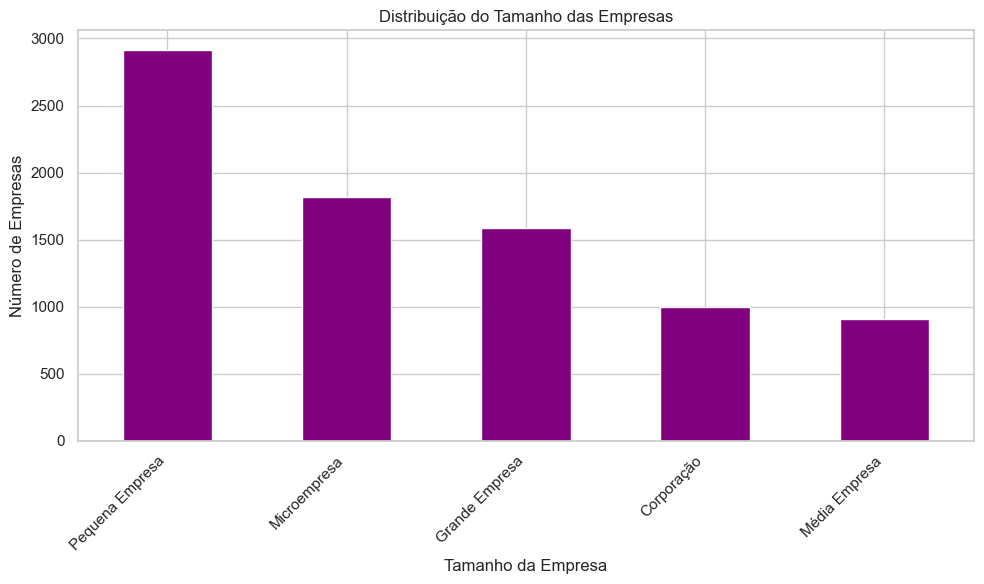

In [158]:
# Distribuição da quantidade de empresas se baseando no seu tamanho
tamanho_empresas = df['Tamanho da Empresa'].value_counts()

plt.figure(figsize=(10, 6))
tamanho_empresas.plot(kind='bar', color='purple')
plt.title('Distribuição do Tamanho das Empresas')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

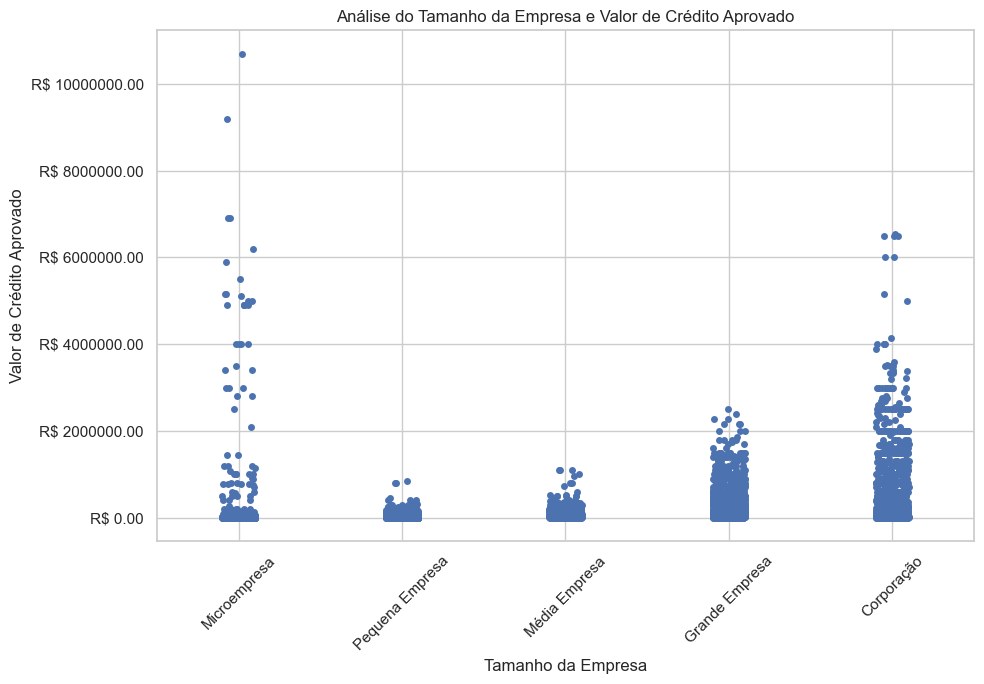

In [159]:
# Análise do tamanho da empresa e o valor de crédito aprovado

import matplotlib.ticker as ticker

plt.figure(figsize=(10, 7))
sns.stripplot(x='Tamanho da Empresa', y='valorAprovado', data=df, jitter=True)
plt.title('Análise do Tamanho da Empresa e Valor de Crédito Aprovado')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Valor de Crédito Aprovado')
plt.xticks(rotation=45)
plt.grid(True)

# Formatando os rótulos do eixo y em reais
formatter = ticker.FormatStrFormatter('R$ %.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

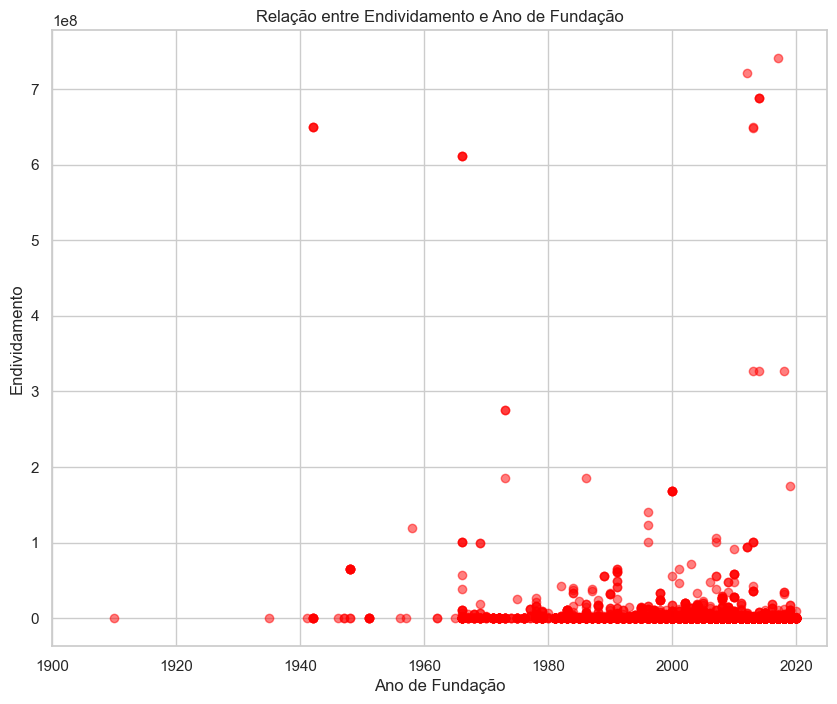

In [160]:
# endividamento com relação ao ano de fundação da empresa. 
# Isso irá ajudar a identificar se existe alguma relação entre o endividamento e o tempo de existência da empresa.

plt.figure(figsize=(10, 8))
plt.scatter(df['anoFundacao'], df['endividamento'], color='red', alpha=0.5)
plt.title('Relação entre Endividamento e Ano de Fundação')
plt.xlabel('Ano de Fundação')
plt.ylabel('Endividamento')
plt.xlim(1900, 2025) 
plt.grid(True)
plt.show()

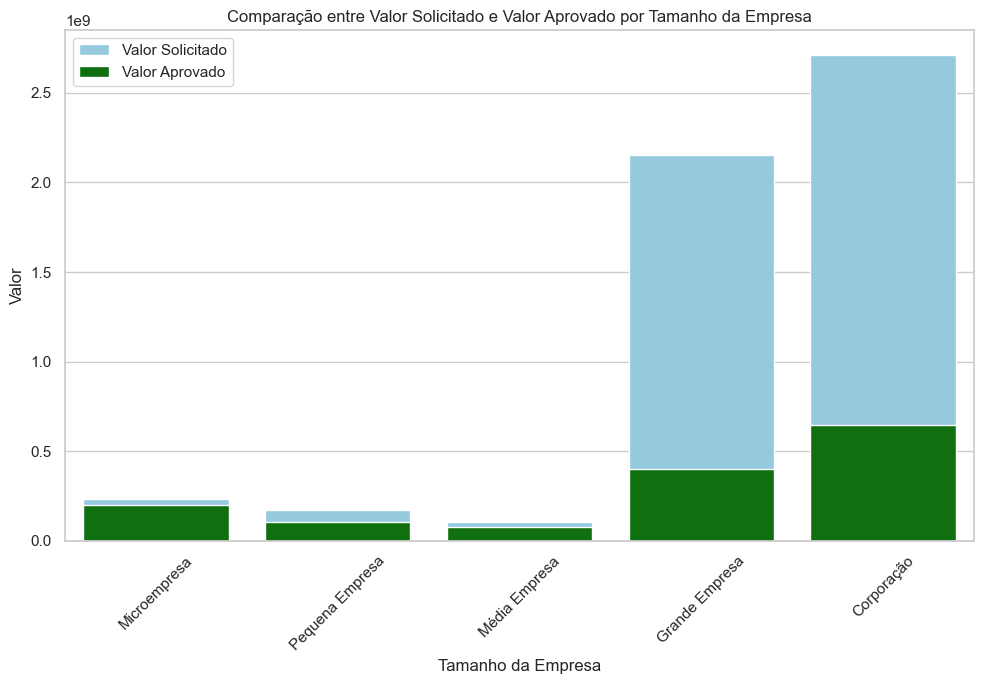

In [161]:
# valor de crédito solicitado em relação ao valor aprovado

stacked_df = df.groupby('Tamanho da Empresa', observed=False).agg({'valorSolicitado': 'sum', 'valorAprovado': 'sum'}).reset_index()


plt.figure(figsize=(10, 7))

sns.barplot(x='Tamanho da Empresa', y='valorSolicitado', data=stacked_df, color='skyblue', label='Valor Solicitado')
sns.barplot(x='Tamanho da Empresa', y='valorAprovado', data=stacked_df, color='green', label='Valor Aprovado')

plt.title('Comparação entre Valor Solicitado e Valor Aprovado por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

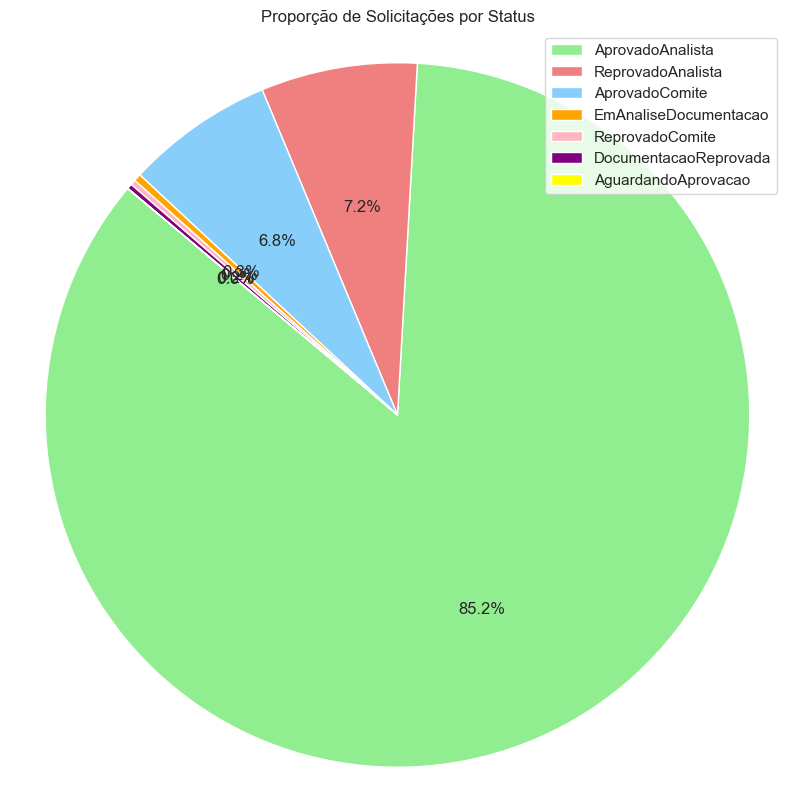

In [172]:
# proporção de solicitações aprovadas, reprovadas e em espera.

status_counts = df['status'].value_counts()

labels = status_counts.index
sizes = status_counts.values
colors = ['lightgreen', 'lightcoral', 'lightskyblue', 'orange', 'lightpink', 'purple', 'yellow']

plt.figure(figsize=(10, 10))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Solicitações por Status')
plt.axis('equal') 
plt.legend(labels, loc='upper right')
plt.show()




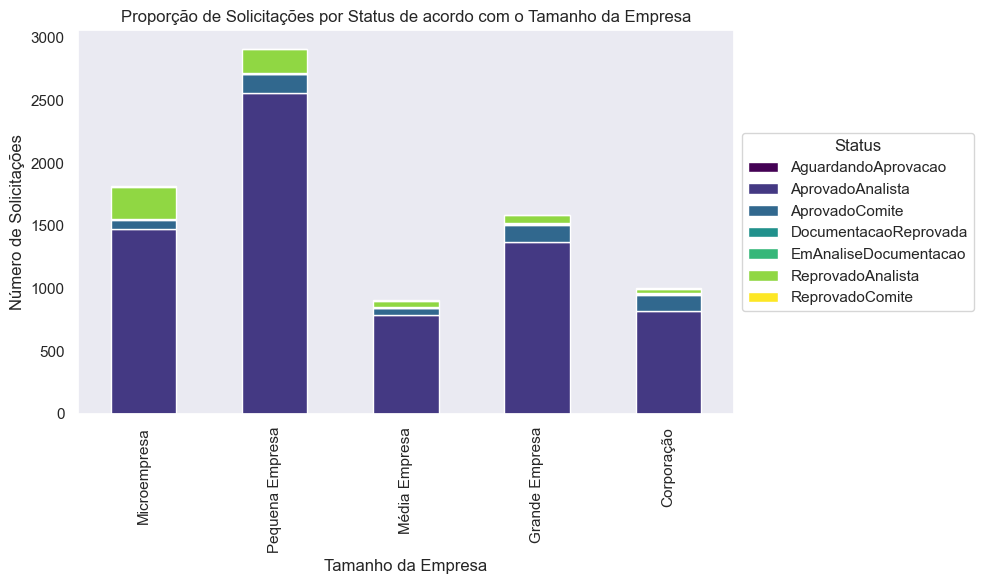

In [176]:
status_by_size = df.groupby(['Tamanho da Empresa', 'status'], observed=False).size().unstack(fill_value=0)

status_by_size.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')

sns.set_theme(style="whitegrid")

plt.title('Proporção de Solicitações por Status de acordo com o Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Solicitações')
plt.legend(title='Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
# margem bruta acumulada em relação ao ativo circulante 
# podendo mostrar se há alguma relação entre a saúde financeira da empresa e sua capacidade de obter crédito.

In [ ]:
# prazo médio de recebimento de vendas ao longo do tempo (com base na data da primeira compra)

In [ ]:
# Comparar a distribuição de valores de margem bruta acumulada entre os clientes aprovados e reprovados
# podendo revelar diferenças significativas na saúde financeira.